# Kollidierende Blöcke

Inspiriert von [3Blue1Browns video](https://www.youtube.com/watch?v=HEfHFsfGXjs)

[![3Blue1Browns video](http://img.youtube.com/vi/HEfHFsfGXjs/0.jpg)](http://www.youtube.com/watch?v=HEfHFsfGXjs)

## Initialisierung

In [27]:
import math
import matplotlib.pyplot as plt
import numpy as np
# Masse
m_1 = 1
m_2 = None
# Block 1
v_1 = 0
u_1 = None
# Block 2
v_2 = -1
u_2 = None
# Listen für den Graph
lst_v_1 = []
lst_v_2 = []

## Kollision

Die Geschwindigkeiten der Blöcke nach der Kollision $u_1$ und $u_2$ können aus den Geschwindigkeiten vor der Kollision $v_1$ und $v_2$ und den Massen $m_1$ und $m_2$ der Blöcke berechnet werden.

$$u_1 = v_1 \frac{m_1-m_2}{m_1+m_2} + v_2 \frac{2m_2}{m_1+m_2}$$

$$u_2 = v_1 \frac{2m_1}{m_1+m_2} + v_2 \frac{m_2-m_1}{m_1+m_2}$$

In [2]:
# Kollision zweier Blöcke
def kollision(v_1, v_2, m_1, m_2):
    # v_1, v_2 == Anfangsgeschwindigkeiten
    # u_1, u_2 == resultierende Geschwindigkeiten
    global u_1
    global u_2
    u_1 = v_1 * ((m_1-m_2) / (m_1+m_2)) + v_2 * (2*m_2 / (m_1+m_2))
    u_2 = v_1 * (2*m_1 / (m_1+m_2)) + v_2 * ((m_2-m_1) / (m_1+m_2))

## Entwicklung der beiden Blöcke

Kollisionen der beiden Blöcke untereinander und mit der Wand, bis sich beide Blöcke in die selbe Richtung bewegen, sodass es keine Kollision mehr geben kann.

In [3]:
# Entwicklung der Anfangsbedingungen
def ablauf_kollision(v_1, v_2, m_1, m_2):
    # Anzahl der Kollisionen
    n = 0
    lst_v_1 = []
    lst_v_2 = []
    while True:
        # Kollision der Blöcke
        kollision(v_1, v_2, m_1, m_2)
        n += 1
        lst_v_1.append(u_1)
        lst_v_2.append(u_2)
        if u_1 < u_2 and u_2 >= 0 and u_1 >= 0:
            return n, lst_v_1, lst_v_2
        # Kollision von Block mit Wand
        v_1 = -u_1
        v_2 = u_2
        n += 1
        lst_v_1.append(v_1)
        lst_v_2.append(v_2)
        if v_1 < v_2 and v_2 >= 0 and v_1 >= 0:
            return n, lst_v_1, lst_v_2

## Pi-Kandidaten

Wenn das Verhältnis der Masse der Blöcke $\frac{m_1}{m_2}=100^{1-a}$, beträgt die Anzahl der Kollisionen die ersten $a$ Ziffern von $\pi$.

In [7]:
# 10er-Potenzen durchgehen
for a in range(0,11):
    # Masse
    m_2 = 10**a
    # Geschwindigkeit zurücksetzen
    v_1 = 0
    v_2 = -1
    # Anzahl der Kollisionen
    n = ablauf_kollision(v_1, v_2, m_1, m_2)[0]
    # Pi-Kandidaten
    if a%2 == 0:
        print("->", n)
    else:
        print("  ", n)
    

-> 3
   10
-> 31
   99
-> 314
   993
-> 3141
   9934
-> 31415
   99345
-> 314159


## Graph der Geschwindigkeiten

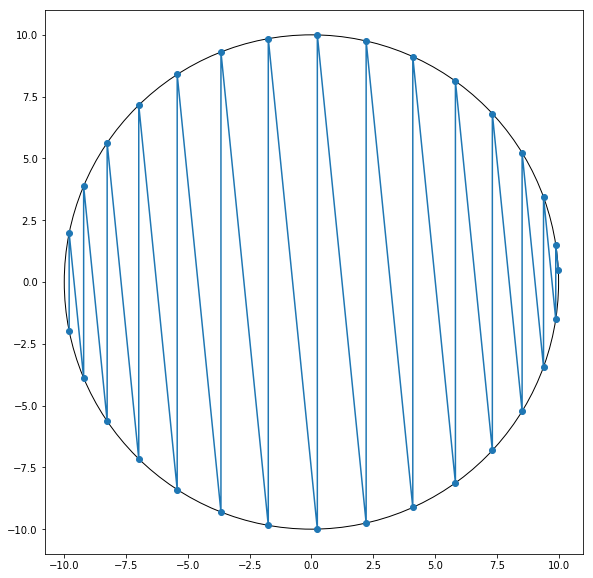

In [47]:
m_2 = 100
# Datenpunkte importieren
v = ablauf_kollision(0, -1, 1, m_2)
# Momentum berechnen
lst_p_1 = v[1]
lst_p_2 = [math.sqrt(m_2) * i for i in v[2]]
# Plot
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
# Graph
plt.plot(lst_p_2, lst_p_1, marker='o')

# Linie oder Dreieck für die Endzone hinzufügen

# Kreis
kreis = plt.Circle((0,0), math.sqrt(m_2), fill=False)
ax.add_artist(kreis)
# Plot einstellen
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()